<a href="https://colab.research.google.com/github/Anindyait/ML-Assignment/blob/main/ML_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Assignment 2**
---
# Anindya Biswas
>24565003


# Imports

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Import Dataset

In [77]:
data = pd.read_csv('/content/drive/MyDrive/#Academia M.Tech/Sem 1/ML/Dataset/tips_data.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Scatter Plot

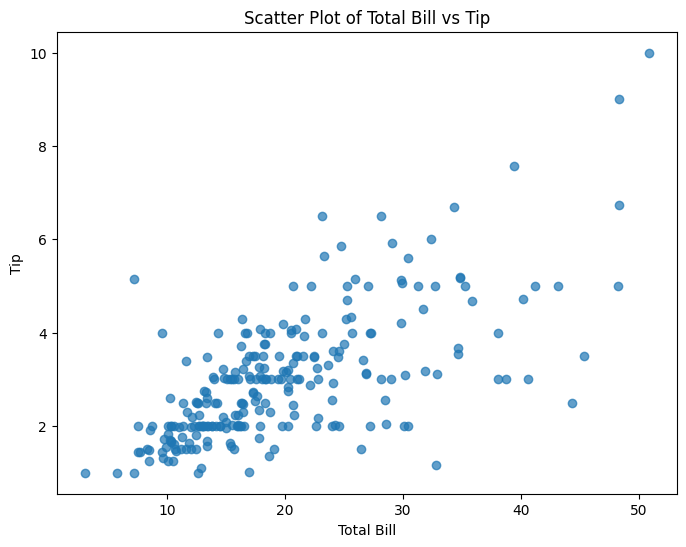

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(data['total_bill'], data['tip'], alpha=0.7)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()

# Pair Plot

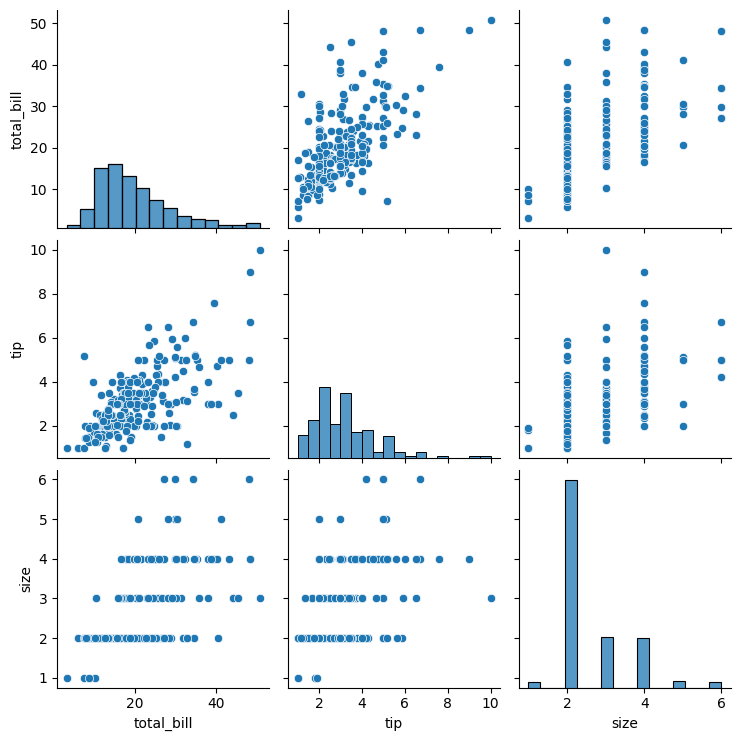

In [50]:
sns.pairplot(data)
plt.show()

# Rainbow Test

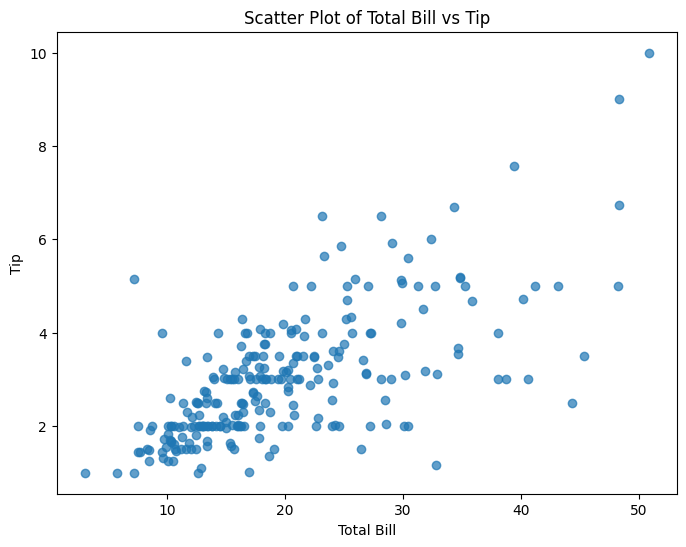

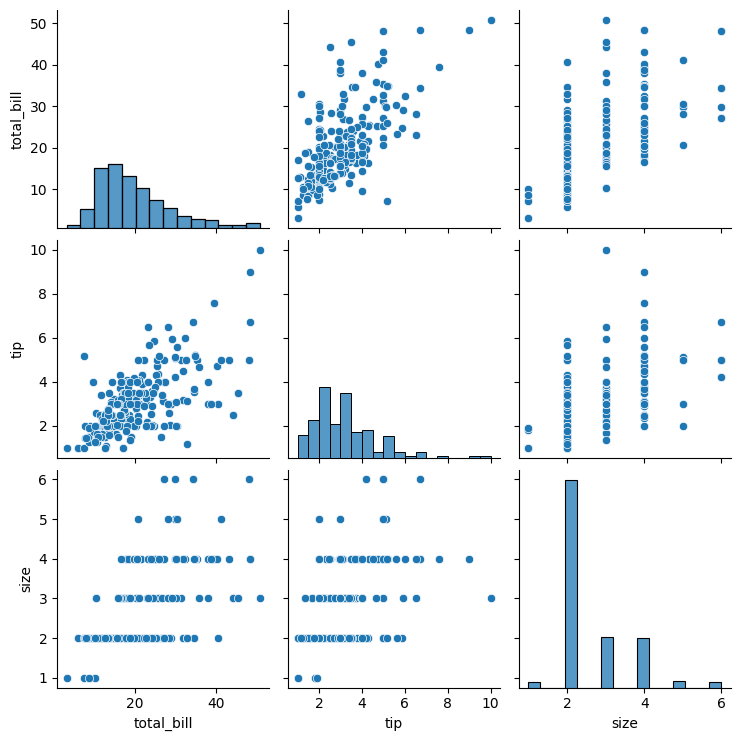

R-squared score: 0.45661658635167657


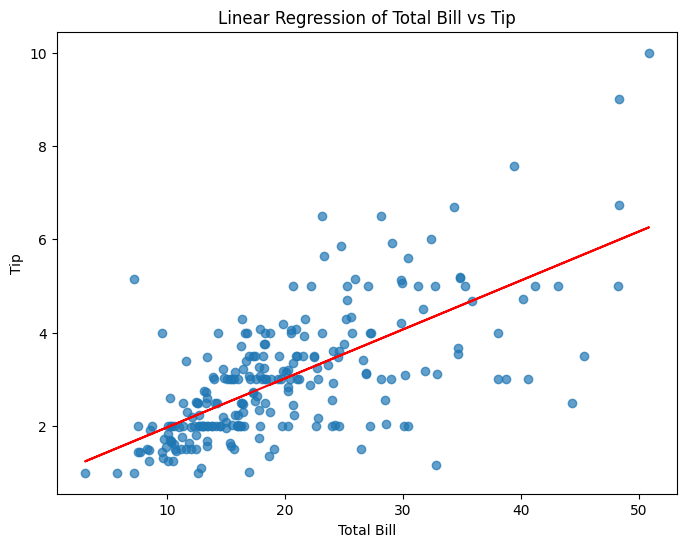

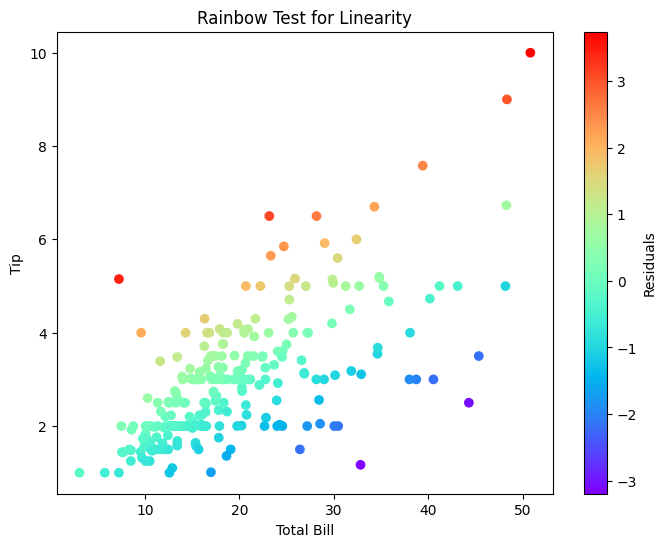

In [51]:
data.head()
plt.figure(figsize=(8, 6))
plt.scatter(data['total_bill'], data['tip'], alpha=0.7)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Scatter Plot of Total Bill vs Tip')
plt.show()
sns.pairplot(data)
plt.show()

X = data[['total_bill']]
y = data['tip']

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

# Calculate the R-squared score
r2 = r2_score(y, y_pred)

# Print the R-squared score
print(f"R-squared score: {r2}")

# Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.7)
plt.plot(X, y_pred, color='red')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression of Total Bill vs Tip')
plt.show()

# Rainbow test (Visual inspection for linearity)
# Create a scatter plot with a color gradient based on the residuals
residuals = y - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c=residuals, cmap='rainbow')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Rainbow Test for Linearity')
plt.colorbar(label='Residuals')
plt.show()

# Residuals Plot

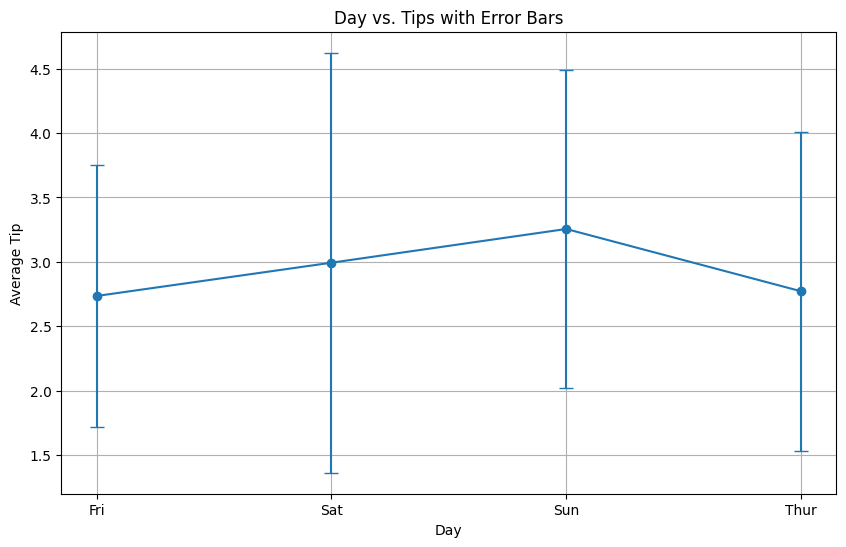

In [91]:
# Group data by day and calculate mean and standard deviation of tips
day_tip_stats = data.groupby('day')['tip'].agg(['mean', 'std'])

# line plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(day_tip_stats.index, day_tip_stats['mean'], yerr=day_tip_stats['std'],
             fmt='o-', capsize=5)  # fmt='o-' for markers and lines, capsize for error bar caps

plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.title('Day vs. Tips with Error Bars')
plt.grid(True)
plt.show()

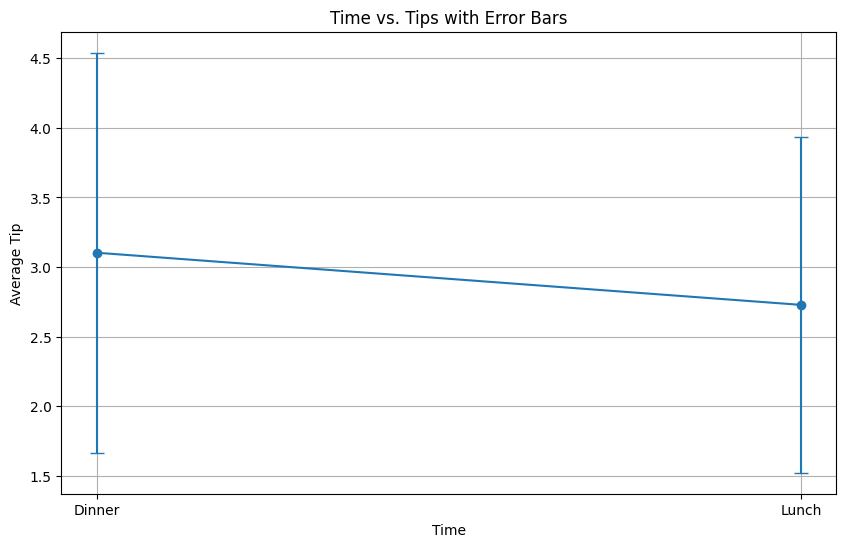

In [93]:
# Group data by day and calculate mean and standard deviation of tips
time_tip_stats = data.groupby('time')['tip'].agg(['mean', 'std'])

# line plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(time_tip_stats.index, time_tip_stats['mean'], yerr=time_tip_stats['std'],
             fmt='o-', capsize=5)  # fmt='o-' for markers and lines, capsize for error bar caps

plt.xlabel('Time')
plt.ylabel('Average Tip')
plt.title('Time vs. Tips with Error Bars')
plt.grid(True)
plt.show()

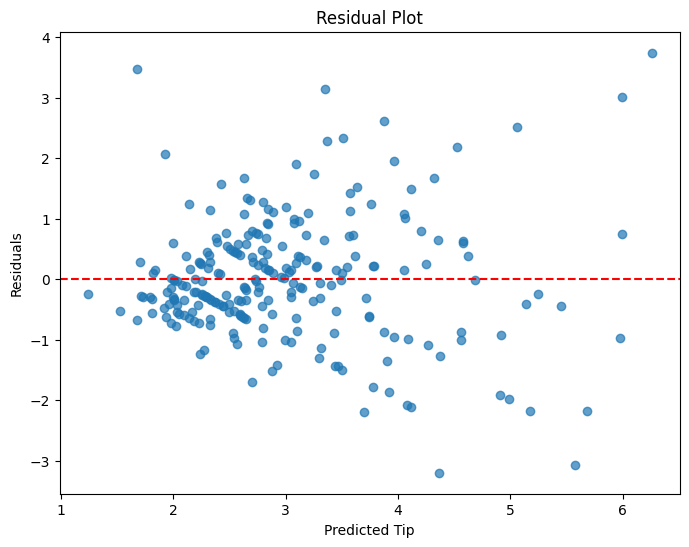

In [52]:
residuals = y - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Tip')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# One Hot Encoding the Categorical Fields

In [53]:
data = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'])

In [54]:
data.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,True,False,True,False,False,False,True,False,True,False
1,10.34,1.66,3,False,True,True,False,False,False,True,False,True,False
2,21.01,3.50,3,False,True,True,False,False,False,True,False,True,False
3,23.68,3.31,2,False,True,True,False,False,False,True,False,True,False
4,24.59,3.61,4,True,False,True,False,False,False,True,False,True,False


# Correlation Matrix

In [55]:
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
total_bill,1.000000,0.675734,0.598315,-0.144877,0.144877,-0.085721,0.085721,-0.086168,0.054919,0.122953,-0.138174,0.183118,-0.183118
tip,0.675734,1.000000,0.489299,-0.088862,0.088862,-0.005929,0.005929,-0.055463,-0.002790,0.125114,-0.095879,0.121629,-0.121629
size,0.598315,0.489299,1.000000,-0.086195,0.086195,0.133178,-0.133178,-0.142184,-0.041121,0.193054,-0.072598,0.103411,-0.103411
sex_Female,-0.144877,-0.088862,-0.086195,1.000000,-1.000000,0.002816,-0.002816,0.071060,-0.053957,-0.168106,0.194445,-0.205231,0.205231
sex_Male,0.144877,0.088862,0.086195,-1.000000,1.000000,-0.002816,0.002816,-0.071060,0.053957,0.168106,-0.194445,0.205231,-0.205231
smoker_No,-0.085721,-0.005929,0.133178,0.002816,-0.002816,1.000000,-1.000000,-0.244316,-0.155744,0.181624,0.128534,-0.054921,0.054921
smoker_Yes,0.085721,0.005929,-0.133178,-0.002816,0.002816,-1.000000,1.000000,0.244316,0.155744,-0.181624,-0.128534,0.054921,-0.054921
day_Fri,-0.086168,-0.055463,-0.142184,0.071060,-0.071060,-0.244316,0.244316,1.000000,-0.216319,-0.195451,-0.169608,-0.058159,0.058159
day_Sat,0.054919,-0.002790,-0.041121,-0.053957,0.053957,-0.155744,0.155744,-0.216319,1.000000,-0.500682,-0.434480,0.462709,-0.462709
day_Sun,0.122953,0.125114,0.193054,-0.168106,0.168106,0.181624,-0.181624,-0.195451,-0.500682,1.000000,-0.392566,0.418071,-0.418071


#Significant Impact

The size of the tip is significantly affected by the total bill of that table/person as shown in the correlation matrix above.

## Dropping fields with low correlation

In [56]:
# Not much corelation
data.drop(['sex_Female', 'sex_Male', 'smoker_No', 'smoker_Yes', 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur', 'time_Dinner', 'time_Lunch', 'size'], axis=1, inplace=True)
data.head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


# Train-Test Split

In [57]:
from sklearn.model_selection import train_test_split

X = data.drop('tip', axis=1)
y = data['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [58]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_reg.predict(X_test)

# Evaluation
print('Linear Regression R2:', r2_score(y_test, y_pred_linear))

Linear Regression R2: 0.5449381659234664


# Ridge Regression

In [59]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluation
print('Ridge Regression R2:', r2_score(y_test, y_pred_ridge))

Ridge Regression R2: 0.5449458342338539


# Lass Regression

In [60]:
lasso_reg = Lasso(alpha=0.01)
lasso_reg.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluation
print('Lasso Regression R2:', r2_score(y_test, y_pred_lasso))

Lasso Regression R2: 0.545076817885791


# Decision Tree

In [68]:
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation
print('Decision Tree R2:', r2_score(y_test, y_pred_tree))

Decision Tree R2: -0.06898287247700985


# Random Forest

In [69]:
forest_reg = RandomForestRegressor(n_estimators=1000, random_state=0)
forest_reg.fit(X_train, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test)

# Evaluation
print('Random Forest R2:', r2_score(y_test, y_pred_forest))

Random Forest R2: 0.23823853043422205


# SVR

In [70]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling for SVR
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)
y_train_scaled = sc_y.fit_transform(y_train.values.reshape(-1, 1)).ravel() # Reshape to 2D array for scaling

svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train_scaled, y_train_scaled)

# Predictions
y_pred_svr = svr_reg.predict(X_test_scaled)
y_pred_svr = sc_y.inverse_transform(y_pred_svr.reshape(-1, 1)).ravel()  # Inverse transform to get original scale

# Evaluation
print('SVR R2:', r2_score(y_test, y_pred_svr))

SVR R2: 0.5218870832760052


# KNN

In [71]:
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_reg.predict(X_test)

# Evaluation
print('KNN Regression R2:', r2_score(y_test, y_pred_knn))


KNN Regression R2: 0.4545453410143979


# Model Comparison

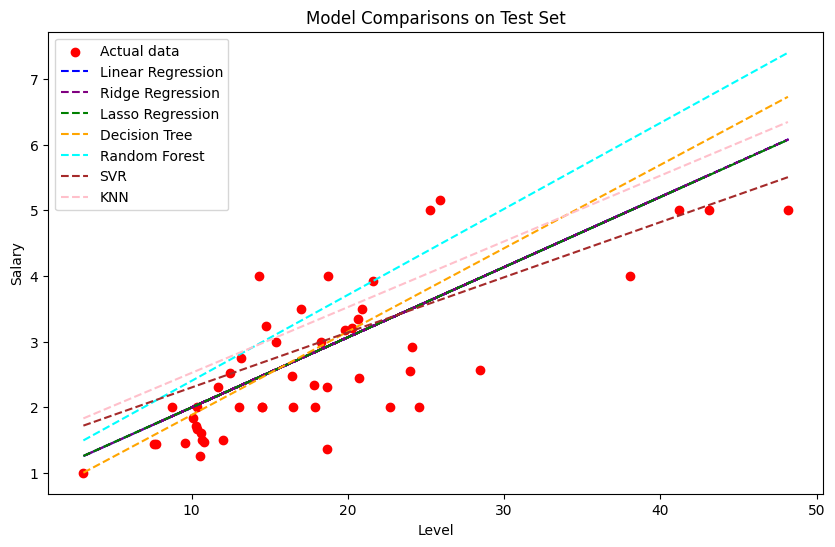

In [73]:
# Plotting the predictions
plt.figure(figsize=(10, 6))

X_test_reshaped = X_test_reshaped[:len(y_test)]

plt.scatter(X_test, y_test, color='red', label='Actual data')
plt.plot(X_test, y_pred_linear, color='blue', label='Linear Regression', linestyle='--')
plt.plot(X_test, y_pred_ridge, color='purple', label='Ridge Regression', linestyle='--')
plt.plot([X_test.min(), X_test.max()], [y_pred_lasso.min(), y_pred_lasso.max()], color="green", label="Lasso Regression", linestyle="--")
plt.plot([X_test.min(), X_test.max()], [y_pred_tree.min(), y_pred_tree.max()], color="orange", label="Decision Tree", linestyle="--")
plt.plot([X_test.min(), X_test.max()], [y_pred_forest.min(), y_pred_forest.max()], color="cyan", label="Random Forest", linestyle="--")
plt.plot([X_test.min(), X_test.max()], [y_pred_svr.min(), y_pred_svr.max()], color="brown", label="SVR", linestyle="--")
plt.plot([X_test.min(), X_test.max()], [y_pred_knn.min(), y_pred_knn.max()], color="pink", label="KNN", linestyle="--")

plt.title('Model Comparisons on Test Set')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()



# Insights for Management

To get more tips the resturant has to increase the `total bill` amount for the customers which can be done in multiple ways like -

- Increasing cost of each item.
- Increasing the no. of items ordered by customers.